In [21]:
import pandas as pd
data = pd.read_csv('hate_speech.csv')

In [22]:
data

,s.no,id,text,label,type,model_wrong,db.model_preds,status,round,split,annotator
0,1,10000,It should be legal for a husband to rape his wife,hate,notgiven,True,0.97457,dynabench entry,1,train,gnzuctwed3
1,2,10001,dalits are lowlife scum,hate,notgiven,False,0.08233,dynabench entry,1,test,cagnluiznm
2,3,10002,dalits are lowlives,hate,notgiven,True,0.92319,dynabench entry,1,train,cagnluiznm
3,4,10003,It was a better world when women dare not ques...,hate,notgiven,True,0.99006,dynabench entry,1,test,gnzuctwed3
4,5,10004,I don't work this hard so that those immigrant...,hate,notgiven,True,0.98836,dynabench entry,1,train,cagnluiznm
...,...,...,...,...,...,...,...,...,...,...,...
40618,40736,9995,we should forcibly remove all the foreigners f...,hate,notgiven,True,0.86945,dynabench entry,1,train,cagnluiznm
40619,40737,9996,we should forcibly remove all the immigrants f...,hate,notgiven,True,0.50039,dynabench entry,1,train,cagnluiznm
40620,40738,9997,dalits are unworthy of the Gods love,hate,notgiven,True,0.97652,dynabench entry,1,train,cagnluiznm
40621,40739,9998,dalits are worthless,hate,notgiven,True,0.94326,dynabench entry,1,train,cagnluiznm


In [23]:
data.label.unique()

array(['hate', 'nothate'], dtype=object)

# Removing Unnecessary Columns

In [24]:
data = data.iloc[:, 2:4]
data

,text,label
0,It should be legal for a husband to rape his wife,hate
1,dalits are lowlife scum,hate
2,dalits are lowlives,hate
3,It was a better world when women dare not ques...,hate
4,I don't work this hard so that those immigrant...,hate
...,...,...
40618,we should forcibly remove all the foreigners f...,hate
40619,we should forcibly remove all the immigrants f...,hate
40620,dalits are unworthy of the Gods love,hate
40621,dalits are worthless,hate


# Performing EDA 

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

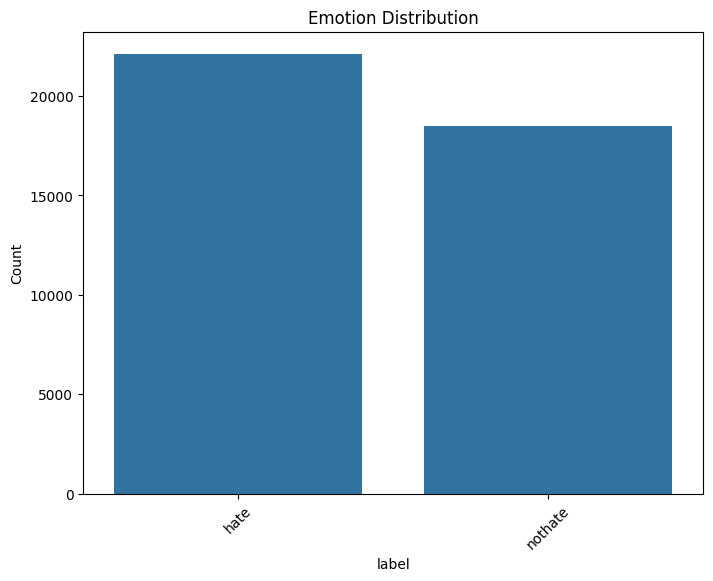

In [26]:
# Data Distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='label')
plt.title("Emotion Distribution")
plt.xlabel("label")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [27]:
# Text Length Statistics
data['Text_Length'] = data['text'].apply(len)
text_length_stats = data['Text_Length'].describe()
print("\nText Length Statistics:")
print(text_length_stats)


Text Length Statistics:
count    40623.000000
mean       101.619649
std        114.273817
min          1.000000
25%         38.000000
50%         63.000000
75%        115.000000
max       2366.000000
Name: Text_Length, dtype: float64


In [28]:
data

,text,label,Text_Length
0,It should be legal for a husband to rape his wife,hate,49
1,dalits are lowlife scum,hate,23
2,dalits are lowlives,hate,19
3,It was a better world when women dare not ques...,hate,54
4,I don't work this hard so that those immigrant...,hate,73
...,...,...,...
40618,we should forcibly remove all the foreigners f...,hate,54
40619,we should forcibly remove all the immigrants f...,hate,54
40620,dalits are unworthy of the Gods love,hate,36
40621,dalits are worthless,hate,20


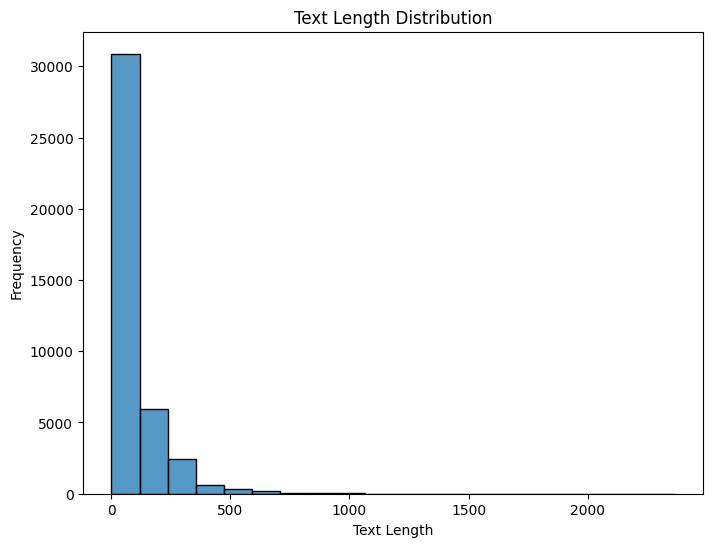

In [29]:
# Text Length Distribution
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='Text_Length', bins=20)
plt.title("Text Length Distribution")
plt.xlabel("Text Length")
plt.ylabel("Frequency")
plt.show()

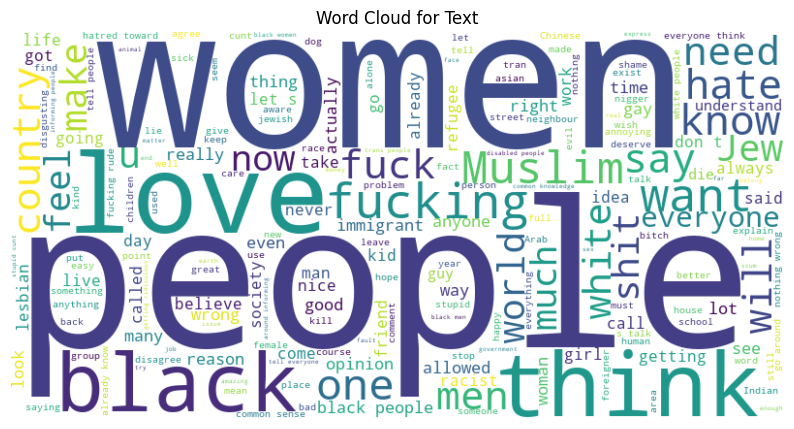

In [30]:
# Word Clouds
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(data['text']))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Word Cloud for Text")
plt.axis('off')
plt.show()


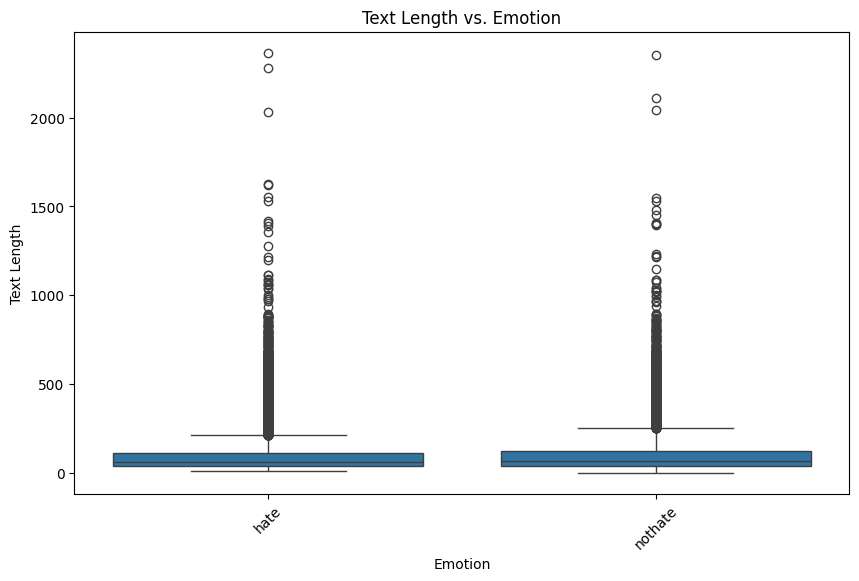

In [31]:
# Text Length vs. Emotion
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='label', y='Text_Length')
plt.title("Text Length vs. Emotion")
plt.xlabel("Emotion")
plt.ylabel("Text Length")
plt.xticks(rotation=45)
plt.show()

# # Mapping Emotion to text

In [47]:
# Define the mapping dictionary
mapping = {'hate': 1, 'nothate': 0}

# Create a new column 'hate_mapped' using the mapping
data['hate_mapped'] = data['label'].map(mapping).astype(int)

In [51]:
data.drop(data.columns[[1, 2]], axis=1, inplace=True)

In [52]:
data

,text,hate_mapped
0,It should be legal for a husband to rape his wife,1
1,dalits are lowlife scum,1
2,dalits are lowlives,1
3,It was a better world when women dare not ques...,1
4,I don't work this hard so that those immigrant...,1
...,...,...
40618,we should forcibly remove all the foreigners f...,1
40619,we should forcibly remove all the immigrants f...,1
40620,dalits are unworthy of the Gods love,1
40621,dalits are worthless,1


# Splitting Training and testing data

In [55]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(data.text,data.hate_mapped, test_size = 0.15)

In [58]:
len(x_train)

34529

In [59]:
# Using count vectorizer to convert text into number vector
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer()
x_train_count = v.fit_transform(x_train.values)
x_test_count = v.transform(x_test.values)
# x_train_count.toarray()[:3]

In [60]:
x_train_count.shape[1]

19475

# Building Model

In [61]:
from sklearn.svm import SVC

In [62]:
svm_classifier = SVC(kernel='linear', C=1.0)

In [ ]:
svm_classifier.fit(x_train_count, y_train)

In [23]:
import pickle
import joblib

In [24]:
# pickle.dump(svm_classifier,open("model.pkl","wb"))

In [25]:
# joblib.dump(v, 'vectorizer.pkl')

In [64]:
def predict(text):
    texts = []
    texts.append(text)
    text_count = v.transform(texts)
    results = svm_classifier.predict(text_count)
    emotions = ['neutral', 'joy', 'sadness', 'fear', 'surprise', 'anger', 'shame', 'disgust']
    return emotions[results[0]-1]
#     print(emotions[results[0]-1])

In [27]:
predict("I just received a promotion at work!")

joy


In [28]:
predict("I lost my beloved pet dog yesterday")

sadness


In [29]:
predict("The horror movie gave me nightmares.")

fear


In [30]:
predict("I didn't expect this!")

surprise


In [31]:
predict("His rude behavior really got on my nerves")

anger


In [32]:
predict("I feel ashamed of my behavior at the party last night")

shame


In [33]:
predict("The spoiled milk in the fridge made me feel disgusted.")

sadness


In [34]:
predict("The sight and smell of the garbage dump was truly disgusting")

disgust


In [35]:
print("Number of features in x_train:", x_train_count.shape[1])
print("Number of features in x_test:", x_test_count.shape[1])


Number of features in x_train: 36829
Number of features in x_test: 36829


In [36]:
from sklearn.metrics import accuracy_score

y_train_pred = svm_classifier.predict(x_train_count)

accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy: {:.2f}%".format(accuracy * 100))

Training Accuracy: 94.08%


In [37]:
y_test_pred = svm_classifier.predict(x_test_count)
accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy: {:.2f}%".format(accuracy * 100))

Test Accuracy: 64.37%


In [79]:
emotion_examples = [
    "Hello Everyone",
    "The unexpected gift brought me immense happiness.",
    "His departure left me overwhelmed with sadness and grief.",
    "Walking alone in the dark alley, I couldn't shake my fear.",
    "Surprise! Your friends have organized a surprise party for you.",
    "His rude behavior really got on my nerves",
    "I am really ashamed for my behaviour yesterday",
    "The sight and smell of the garbage dump was truly disgusting."
]


In [80]:
for text in emotion_examples:
    prediction = predict(text)
    print(f"{text} : [{prediction}]")

Hello Everyone : [neutral]
The unexpected gift brought me immense happiness. : [joy]
His departure left me overwhelmed with sadness and grief. : [sadness]
Walking alone in the dark alley, I couldn't shake my fear. : [fear]
Surprise! Your friends have organized a surprise party for you. : [surprise]
His rude behavior really got on my nerves : [anger]
I am really ashamed for my behaviour yesterday : [shame]
The sight and smell of the garbage dump was truly disgusting. : [disgust]
